In [1]:
from hopfieldnetwork import HopfieldNetwork
from inputdatabuilder import InputDataBuilder
from utils import create_noisy_array, create_random_array

import numpy as np
import matplotlib.pyplot as plt

In [2]:
show_noise = False
verbose = False
num_inputs = 100
num_states = 5
plot_x = []
plot_y = []
count = 0

# different noise levels
noise = 0.3

for num_states in range(1, 20):
    # train on a random array
    hn = HopfieldNetwork(num_inputs)
    
    input_vecs = []
    for _ in range(0, num_states):
        input_vecs.append(create_random_array(num_inputs, 0.5))

    hn.batch_update(input_vecs)
    
    for input_vec in input_vecs:
        for _ in range(0, 10):
            # create new noise vector
            noisy_input = create_noisy_array(input_vec, noise)

            # recall
            recovered_array = hn.recall(noisy_input, tol=1e-05, verbose=False)

            # count number correct
            num_correct = np.count_nonzero(np.array(input_vec) == np.array(recovered_array))
            percentage = 100 * num_correct / len(recovered_array)
            num_misses = len(input_vec) - num_correct

            # visualize difference in vectors
            if show_noise and count % 20 == 0:
                plt.figure()
                plt.plot(input_vec)
                plt.plot(noisy_input)
                plt.show()
            count += 1

            plot_x.append(num_states)
            plot_y.append(num_misses)

8.0

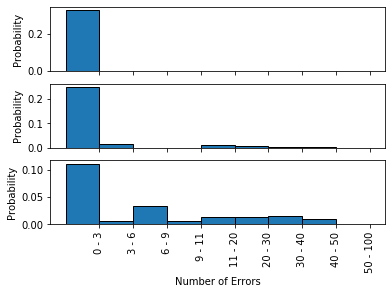

In [7]:
f, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True)
plot_x = np.array(plot_x)
plot_y = np.array(plot_y)
bins = [0, 3, 6, 9, 11, 20, 30, 40, 50, 100]

n5_idxs = (plot_x == 5)

hist, bin_edges = np.histogram(plot_y[n5_idxs], bins, density=True)
ax1.bar(range(len(hist)), hist, width=1, edgecolor='k')
ax1.set_xticks([0.5+i for i,j in enumerate(hist)])
ax1.set_ylabel("Probability")

n10_idxs = (plot_x == 10)

hist, bin_edges = np.histogram(plot_y[n10_idxs], bins, density=True)
ax2.bar(range(len(hist)), hist, width=1, edgecolor='k')
ax2.set_xticks([0.5+i for i,j in enumerate(hist)])
ax2.set_ylabel("Probability")

n15_idxs = (plot_x == 15)

hist, bin_edges = np.histogram(plot_y[n15_idxs], bins, density=True)
ax3.bar(range(len(hist)), hist, width=1, edgecolor='k')
ax3.set_xticks([0.5+i for i,j in enumerate(hist)])
ax3.set_xticklabels(['{} - {}'.format(bins[i],bins[i+1]) for i,j in enumerate(hist)])
ax3.set_ylabel("Probability")

plt.xlabel("Number of Errors")
plt.xticks(rotation=90)
plt.show()